In [1]:
import pandas as pd
import random as rd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


# Data

In [2]:
observations = ['obs' + str(i) for i in range(1,101)]

sA = ['sampleA' + str(i) for i in range(1,6)]
sB = ['sampleB' + str(i) for i in range(1,6)]

In [3]:
data = pd.DataFrame(columns=[*sA, *sB], index=observations)

In [4]:
for observation in data.index:
  data.loc[observation, 'sampleA1':'sampleA5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
  data.loc[observation, 'sampleB1':'sampleb5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [5]:
data.head()

,sampleA1,sampleA2,sampleA3,sampleA4,sampleA5,sampleB1,sampleB2,sampleB3,sampleB4,sampleB5
obs1,532,567,604,591,560,178,162,174,177,168
obs2,919,989,907,1012,913,891,866,855,888,859
obs3,40,54,62,58,56,900,953,960,887,901
obs4,20,19,16,17,24,472,497,484,498,497
obs5,506,490,483,504,516,933,918,921,931,944


# Scaling

In [6]:
# Transposta porque Samples tem que ser ROWS
scaled_data = preprocessing.scale(data.T)

# PCA

In [7]:
pca = PCA()

In [8]:
#fit (learn the parameters of the data)
pca.fit(scaled_data)

PCA()

In [9]:
# transform (apply PCA)
pca_data = pca.transform(scaled_data)

In [10]:
per_var = np.round(pca.explained_variance_ratio_*100, 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

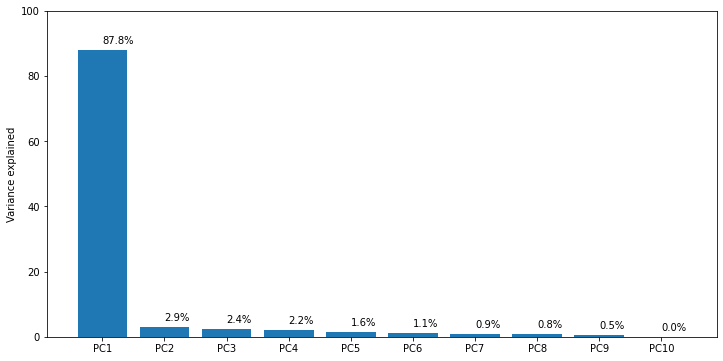

In [11]:
plt.figure(figsize=(12,6))
plt.bar(x=labels, height=per_var)
plt.ylabel('Variance explained')
plt.ylim((0, 100))

for i, pc in enumerate(per_var):
  plt.annotate(str(pc)+'%', (i, pc+2))

plt.show()

In [12]:
pca_df = pd.DataFrame(pca_data, index=[*sA, *sB], columns=labels)

In [13]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
sampleA1,-8.933462,-0.911541,-1.446782,2.726594,-0.834008,0.997705,-0.392382,-0.394416,-0.896682,1.997639e-15
sampleA2,-9.595433,0.881439,-0.352418,-0.764406,-1.601256,-1.345314,1.256952,-1.235787,0.306387,8.152110e-16
sampleA3,-9.154987,-1.368998,0.754633,-0.680010,2.807192,-0.435024,0.854454,0.163620,-0.674146,3.585847e-16
sampleA4,-9.795019,0.922628,-1.913034,-1.708353,-0.479002,-0.014170,-0.748547,1.701894,0.215264,5.646465e-16
sampleA5,-9.342417,0.278920,2.967455,0.593371,0.140755,0.774526,-0.968507,-0.239420,1.045661,1.792160e-15
sampleB1,9.244601,1.645985,0.415608,0.934129,-0.164347,1.254565,1.840088,0.908845,0.221390,-7.061763e-16
sampleB2,9.955300,-2.730129,-1.265074,1.396050,0.379767,-1.180429,-0.116931,0.253460,1.020830,-4.296391e-16
sampleB3,9.140536,-1.679380,-0.599941,-2.617153,-0.250659,1.584989,-0.225849,-0.989117,-0.046791,-5.588835e-16
sampleB4,9.079987,3.425246,-0.903727,0.404471,1.487111,-0.537083,-0.966286,-0.795298,-0.182503,-1.111314e-15
sampleB5,9.400894,-0.464171,2.343282,-0.284693,-1.485553,-1.099765,-0.532991,0.626220,-1.009409,2.997422e-16


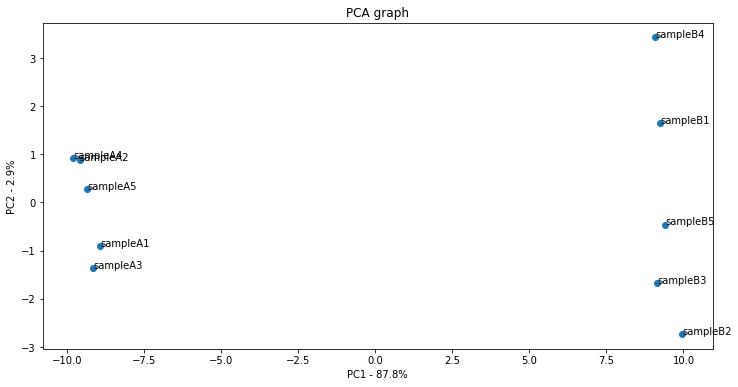

In [14]:
# graph
plt.figure(figsize=(12,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA graph')
plt.xlabel(f'PC1 - {per_var[0]}%')
plt.ylabel(f'PC2 - {per_var[1]}%')

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]) )

plt.show()

# Consider All the Principal Components

In [15]:
# Multiply (weigh) by the explained proportion
pca_df2 = pca_df.mul(pca.explained_variance_ratio_)

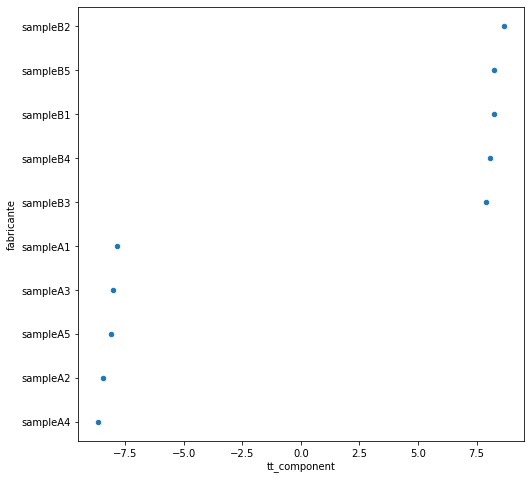

In [18]:
# Sum of the components
pca_df2 = pd.DataFrame({'sample':pca_df2.index, 'tt_component': pca_df2.sum(axis=1)}).sort_values(by='tt_component')

# Plot
pca_df2.plot.scatter(x='tt_component', y='sample', figsize=(8,8));